Imports and a Recurrent function definition

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_results(number, titles, images, row, column):
    plt.figure(figsize=(12, 8))
    for i in range(number):
        plt.subplot(row, column, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i]), plt.axis('off')
    plt.tight_layout()
    plt.show()

An all black image

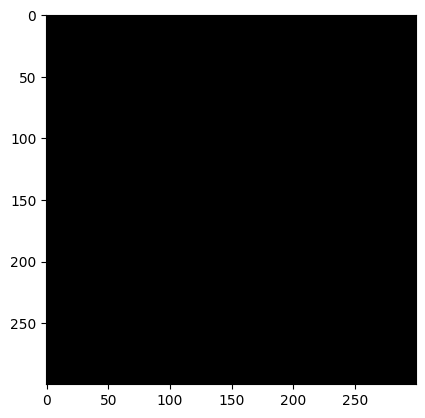

In [3]:
image = np.zeros((300,300,3), dtype=np.uint8) #fills the 300*300 matrix with 0

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) #cv has default color BGR so converted to RGB

plt.show()

Image with some gray levels

(np.float64(-0.5), np.float64(3.5), np.float64(3.5), np.float64(-0.5))

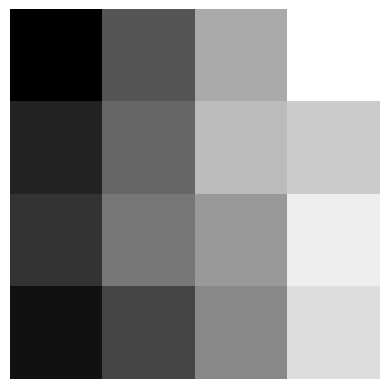

In [4]:
nd_array = np.array([
    [100, 150, 200, 250],
    [120, 160, 210, 220],
    [130, 170, 190, 240],
    [110, 140, 180, 230]
], dtype=np.uint8) #creating an array with different grayvalue with size 8 bit
plt.imshow(nd_array, cmap='gray')
plt.axis('off')

Different Color Representations

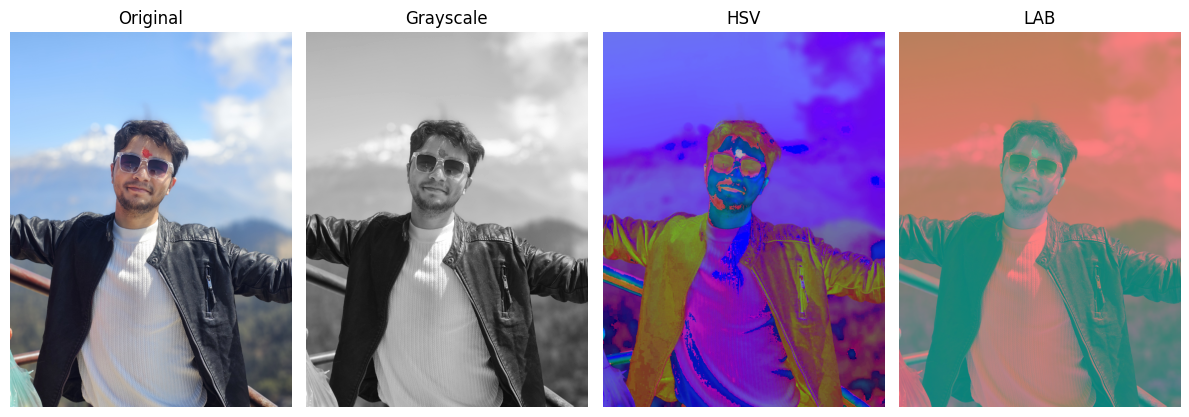

In [5]:
image = cv2.imread("photo.jpg")
images = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #Conversion to gray

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) #conversion to HSV format

lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB) #conversion to LAB

titles = ['Original', 'Grayscale', 'HSV', 'LAB']
imgs = [images, gray, hsv, lab]
show_results(4, titles, imgs, 1, 4)

In [ ]:
#Quantization of an Image signal
img = np.array([0, 63, 64, 127, 128, 191, 192, 255])
quantized = (img // 16) * 16 #Converted to 4 bit by // 16 then mapped to 8 bit by *16
print("Original", img)
print("Quantized", quantized)

Original [  0  63  64 127 128 191 192 255]
Quantized [  0  48  64 112 128 176 192 240]


Sampling and Quantization oof different types of images

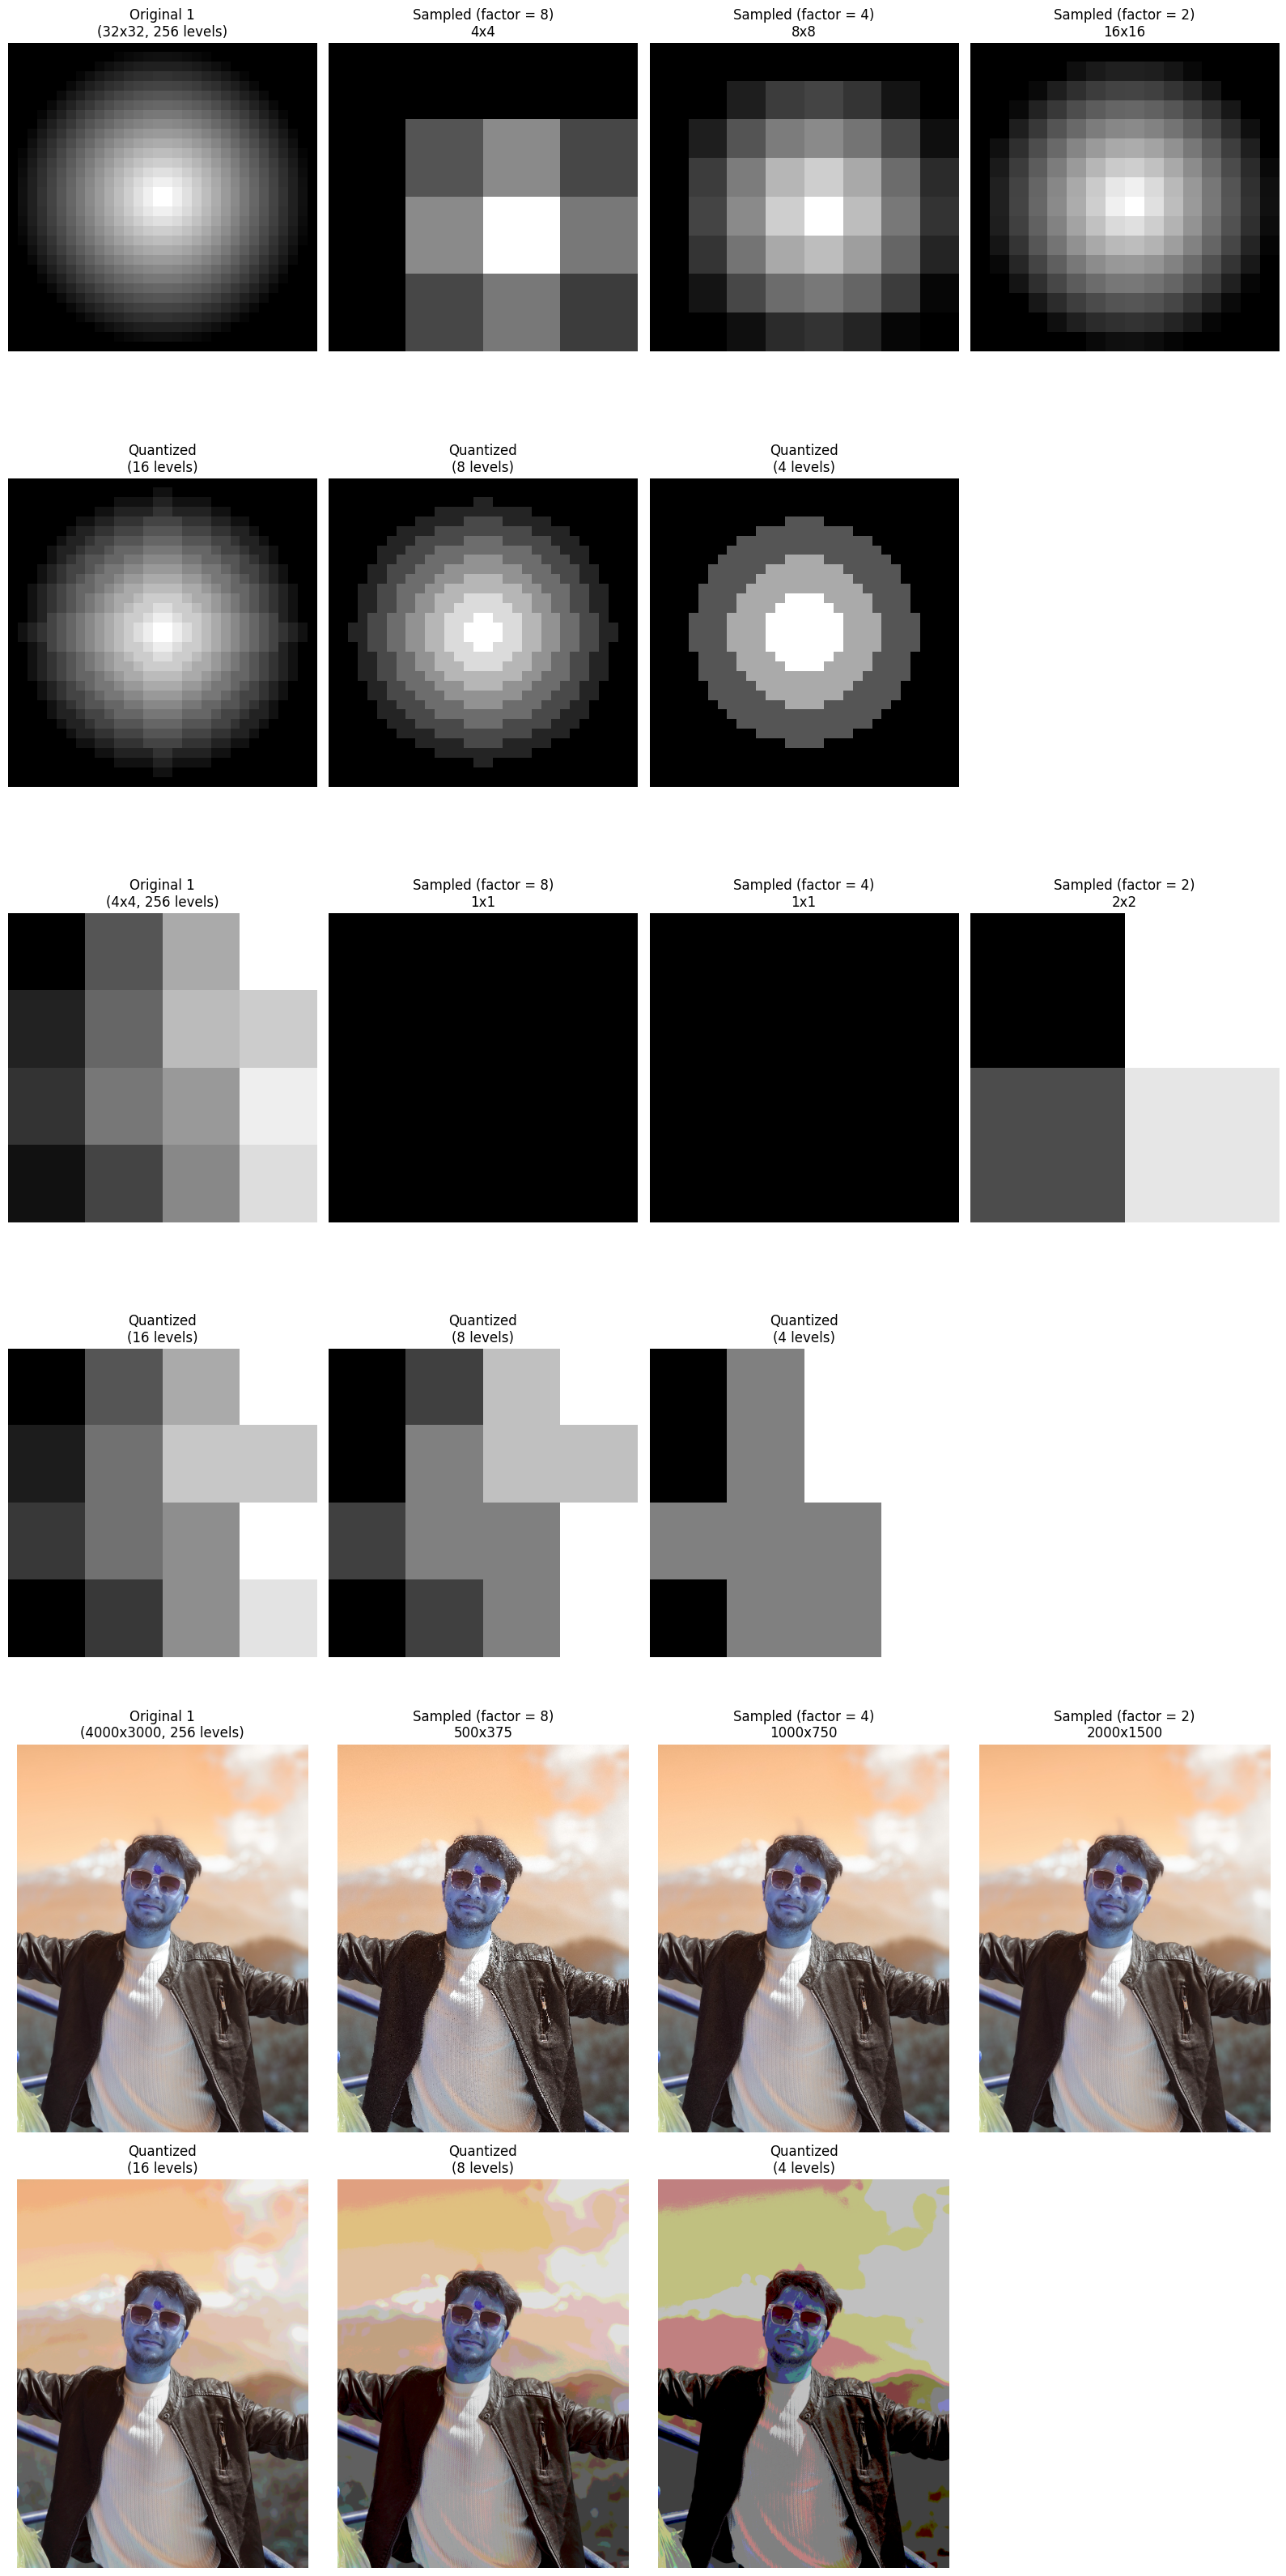

In [7]:
#creates a circular gradient pattern
def create_image(size= 32):
    x= np.linspace(-1, 1, size) #returns evenly spaced number over a specified interval
    y= np.linspace(-1, 1, size)
    X, Y = np.meshgrid(x,y) #A tuple of coordinate matrices from coordinate vectors x and y like X[i,j], Y[i,j]
    R = np.sqrt(X**2 + Y**2) #Euclidean distance. Near the center have small values, and near the edge have larger R
    return (255 * (1-R)).clip(0, 255).astype(np.uint8) #1-R invert the distance. Multiplication by 255 scale to 0 - 255. clip() makes the value inside the range.

def create_own_ndarray():
    nd_array = np.array([
        [100, 150, 200, 250],
    [120, 160, 210, 220],
    [130, 170, 190, 240],
    [110, 140, 180, 230]
    ], dtype=np.uint8)
    return nd_array

def own_img():
    img = cv2.imread('photo.jpg')
    original = np.array(img, dtype=np.uint8)
    return original

def sample_img(img, factor):
    #Reduce image resolution by taking every nth pixel
    return img[::factor, ::factor]

def quantized_image(img, levels):
    #Reduce number of intensity levels
    factor = 256 //levels
    return (img // factor) * factor

img1 = create_image(32)
img2 = create_own_ndarray()
img3 = own_img()

sampling_factors = [8,4,2]
quant_levels = [16,8,4]

fig, axs = plt.subplots(6, 4, figsize=(16,32))

imgs = [img1, img2, img3]
#Process first image (synthetic)
for j in range (0,3):
    axs[j*2,0].imshow(imgs[j], cmap='gray')
    axs[j*2,0].set_title(f'Original 1\n({imgs[j].shape[0]}x{imgs[j].shape[1]}, 256 levels)')

    for i, factor in enumerate(sampling_factors):
        sampled = sample_img(imgs[j], factor)
        axs[2*j, i+1].imshow(sampled, cmap='gray')
        axs[2*j, i+1].set_title(f'Sampled (factor = {factor})\n{sampled.shape[0]}x{sampled.shape[1]}')

    for i, levels in enumerate(quant_levels):
        quantized = quantized_image(imgs[j], levels)
        axs[2*j+1, i].imshow(quantized, cmap='gray')
        axs[j*2+1, i].set_title(f'Quantized\n({levels} levels)')

for ax in axs.flatten():
    ax.axis('off')
plt.tight_layout()
plt.show()

Sampling and Quantization on the same image

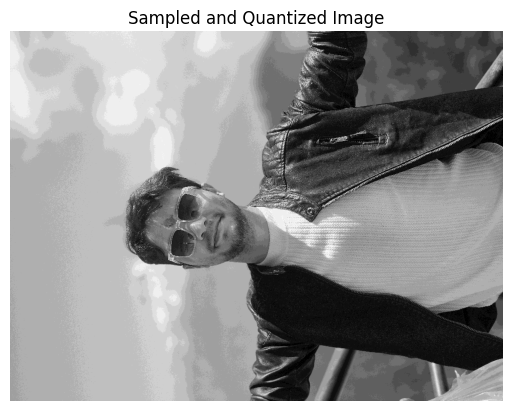

In [8]:
from PIL import Image

def sample_quantized_img (img_path, sampling_factor = 2, quantization_levels = 8):
    img = Image.open(img_path).convert('L')
    #'L' stands for Luminance - it reduces the image to 8-bit grayscale, meaning each pixel will have a value between 0 and 255.
    img_array = np.array(img)
    
    #Sampling (downsampling)
    sampled_array = img_array[::sampling_factor, ::sampling_factor]

    #Quantization
    max_intensity = 255
    bin_size = max_intensity / quantization_levels
    quantized_array =  (sampled_array / bin_size).astype(np.uint8) * bin_size

    #Rescale back to original range for display purposes, to see the effect more clearly.
    #Quantized_array can be used directly
    rescaled_quantized = (quantized_array.astype(float)/(quantization_levels - 1)) * max_intensity
    rescaled_quantized = rescaled_quantized.astype(np.uint8)

    return rescaled_quantized

img_path = "photo.jpg"
sample_quantize_img = sample_quantized_img(img_path, 4, 16)

if sample_quantize_img is not None:
    plt.imshow(sample_quantize_img, cmap='gray')
    plt.title("Sampled and Quantized Image")
    plt.axis('off')
    plt.show()

Displaying the shape, size and channel of an image

In [9]:
print("Shape: ", image.shape)
print("Size: ", image.size)
print("Channels: ", image.shape[2])

Shape:  (4000, 3000, 3)
Size:  36000000
Channels:  3


Saving the image

In [10]:
img = cv2.imread("photo.jpg")

cv2.imwrite("photos.jpg", img)

True

The function waits for a key to be pressed

In [12]:
cv2.imshow("Displayed Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Resizing, cropping, Rotation, Flipping of images as well as writing on image

Text(0.5, 1.0, 'resized Image')

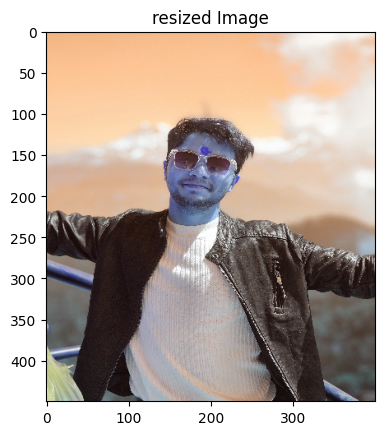

In [ ]:
image = cv2.imread("photo.jpg")
resized = cv2.resize(image, (400, 450))
plt.imshow(resized)
plt.title("resized Image")

Text(0.5, 1.0, 'Cropped Window')

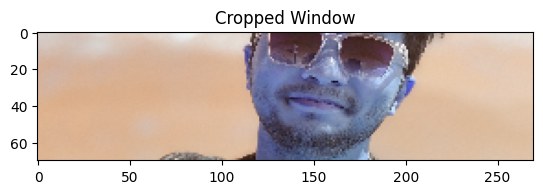

In [25]:
cropped = resized[150:220, 30:300]
plt.imshow(cropped)
plt.title("Cropped Window")

Text(0.5, 1.0, 'Rotated Image')

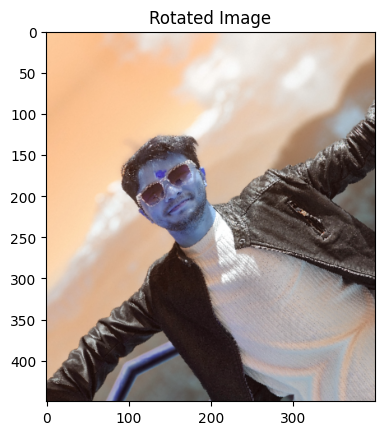

In [26]:
(h,w) = resized.shape[:2]
center = (w//2, h//2)
matrix = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated = cv2.warpAffine(resized, matrix, (w,h), borderMode=cv2.BORDER_REFLECT)
plt.imshow(rotated)
plt.title("Rotated Image")

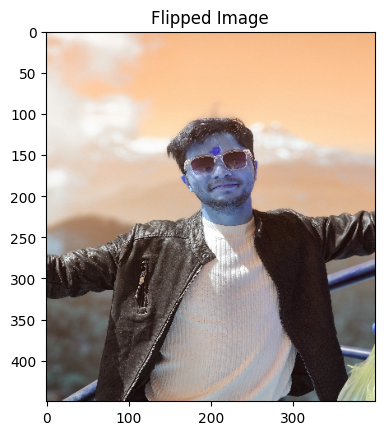

In [27]:
flipped = cv2.flip(resized, 1) #1 for Horizontal, 0 for Vertical
plt.title("Flipped Image")
plt.imshow(flipped)

Text(0.5, 1.0, 'Drawing Shapes')

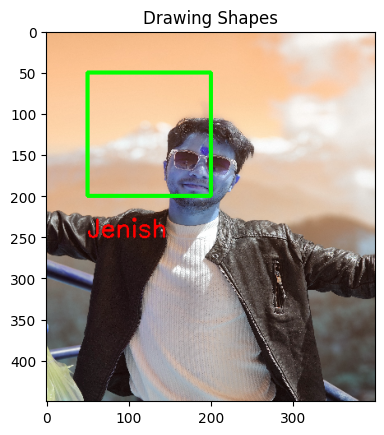

In [28]:
cv2.rectangle(resized, (50,50), (200,200), (0,255,0),3)
cv2.putText(resized, "Jenish", (50, 250), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2)

plt.imshow(resized)
plt.title("Drawing Shapes")

Pixel Neighborhood Analysis (Connectivity, Dstance MEasure)

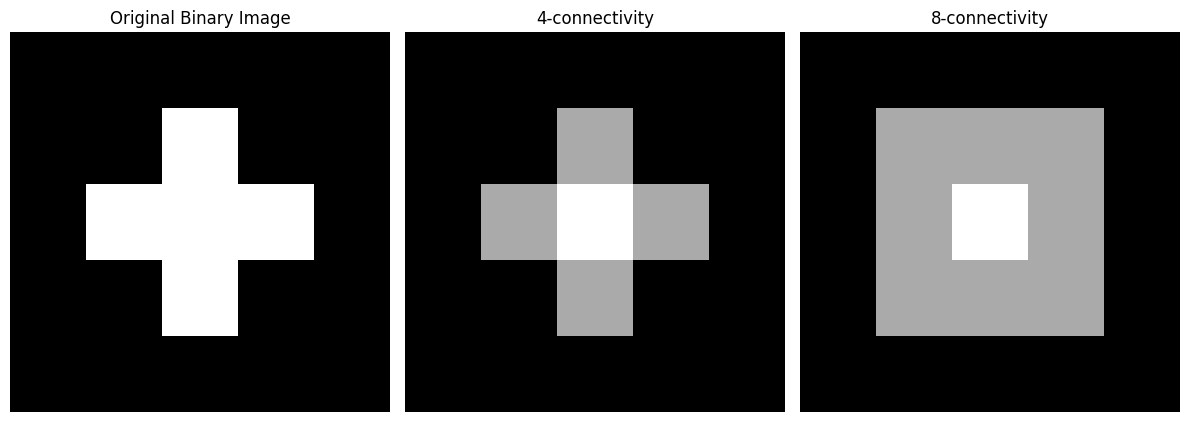

In [29]:
bin_img = np.zeros((5,5), dtype=np.uint8)
bin_img[1:4, 2] = 1
bin_img[2, 1:4] = 1
p = (2,2) #selected pixel

four_con = np.copy(bin_img)
eight_con = np.copy(bin_img)

N4 = [(p[0]- 1, p[1]),(p[0]+ 1, p[1]),
      (p[0], p[1]-1),(p[0], p[1]+1)]
N8 = N4 + [(p[0]- 1, p[1]-1),(p[0]+ 1, p[1]-1),
      (p[0]-1, p[1]+1),(p[0]+1, p[1]+1)]

for i,j in N4:
    if 0 <= i< 5 and 0 <= j < 5:
        four_con[i, j] = 2

for i, j in N8:
    if 0 <= i< 5 and 0 <= j < 5:
        eight_con[i, j] = 2

four_con[p] = 3
eight_con[p] = 3

titles = ['Original Binary Image', '4-connectivity', '8-connectivity']
imgs = [bin_img, four_con, eight_con]

show_results(3, titles, imgs, 1, 3)

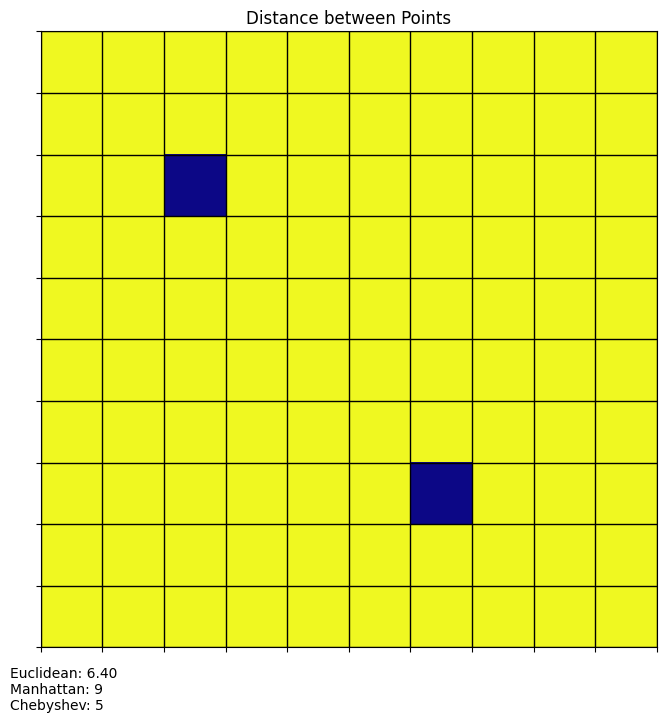

In [30]:
img = np.ones((10, 10), dtype=np.uint8)

p1 = (2, 2) 
p2 = (7, 6)  

img[p1] = 0
img[p2] = 0
euclidean_dist = np.sqrt((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2)
manhattan_dist = abs(p2[0] - p1[0]) + abs(p2[1] - p1[1])
chebyshev_dist = max(abs(p2[0] - p1[0]), abs(p2[1] - p1[1]))

plt.figure(figsize=(8, 8))
plt.imshow(img, cmap='plasma')
plt.title('Distance between Points')

# Add grid
plt.grid(True, color='black', linewidth=1)
plt.xticks(np.arange(-0.5, 10.5, 1), [])
plt.yticks(np.arange(-0.5, 10.5, 1), [])

# Add text annotations
plt.text(-1, 10.5, f'Euclidean: {euclidean_dist:.2f}\nManhattan: {manhattan_dist}\nChebyshev: {chebyshev_dist}')
plt.show()